In [15]:
import pandas as pd
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import scipy.stats
import statsmodels.api as sm
from statsmodels.formula.api import ols


In [12]:
boston_url = 'https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/IBMDeveloperSkillsNetwork-ST0151EN-SkillsNetwork/labs/boston_housing.csv'
boston_df=pd.read_csv(boston_url)

In [13]:
boston_df.head(5)
boston_df.info()
boston_df.shape
boston_df.describe()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 506 entries, 0 to 505
Data columns (total 14 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   Unnamed: 0  506 non-null    int64  
 1   CRIM        506 non-null    float64
 2   ZN          506 non-null    float64
 3   INDUS       506 non-null    float64
 4   CHAS        506 non-null    float64
 5   NOX         506 non-null    float64
 6   RM          506 non-null    float64
 7   AGE         506 non-null    float64
 8   DIS         506 non-null    float64
 9   RAD         506 non-null    float64
 10  TAX         506 non-null    float64
 11  PTRATIO     506 non-null    float64
 12  LSTAT       506 non-null    float64
 13  MEDV        506 non-null    float64
dtypes: float64(13), int64(1)
memory usage: 55.5 KB


,Unnamed: 0,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,LSTAT,MEDV
count,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000
mean,252.500000,3.613524,11.363636,11.136779,0.069170,0.554695,6.284634,68.574901,3.795043,9.549407,408.237154,18.455534,12.653063,22.532806
std,146.213884,8.601545,23.322453,6.860353,0.253994,0.115878,0.702617,28.148861,2.105710,8.707259,168.537116,2.164946,7.141062,9.197104
min,0.000000,0.006320,0.000000,0.460000,0.000000,0.385000,3.561000,2.900000,1.129600,1.000000,187.000000,12.600000,1.730000,5.000000
25%,126.250000,0.082045,0.000000,5.190000,0.000000,0.449000,5.885500,45.025000,2.100175,4.000000,279.000000,17.400000,6.950000,17.025000
50%,252.500000,0.256510,0.000000,9.690000,0.000000,0.538000,6.208500,77.500000,3.207450,5.000000,330.000000,19.050000,11.360000,21.200000
75%,378.750000,3.677083,12.500000,18.100000,0.000000,0.624000,6.623500,94.075000,5.188425,24.000000,666.000000,20.200000,16.955000,25.000000
max,505.000000,88.976200,100.000000,27.740000,1.000000,0.871000,8.780000,100.000000,12.126500,24.000000,711.000000,22.000000,37.970000,50.000000


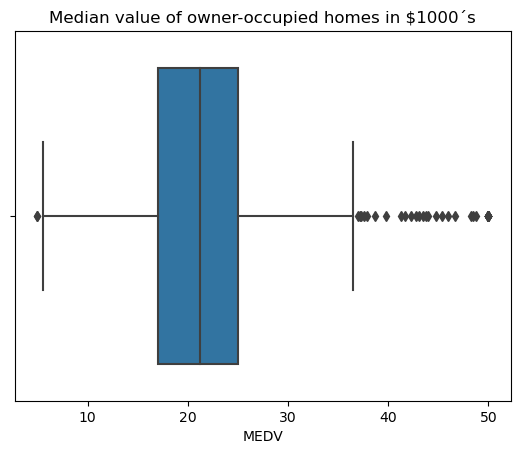

In [20]:
sns.boxplot(x="MEDV", data=boston_df)
plt.title('Median value of owner-occupied homes in $1000´s')
plt.show()

The boxplot shows there are a lots of outliers in the dependent variable. However, at first it is not meaningful to ignore them as long as it does not sound and make any sense.

C:\Users\karen.orozco\AppData\Local\anaconda3\Lib\site-packages\seaborn\axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


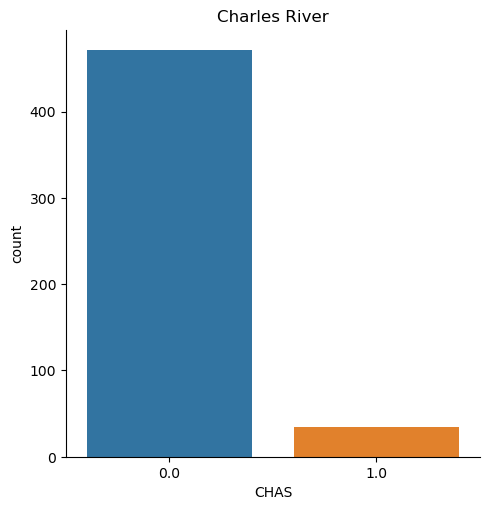

In [21]:
sns.catplot(x='CHAS',  kind='count', data=boston_df)
plt.title('Charles River')
plt.show()

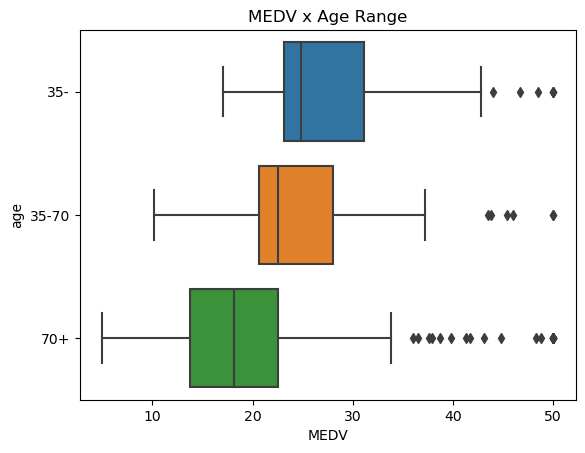

In [17]:
bins = [0,36,70,150] 
nons = ['35-', '35-70', '70+']
boston_df['age'] = pd.cut(boston_df['AGE'], bins, labels=nons)
sns.boxplot(x="MEDV", y="age", data=boston_df)
plt.title("MEDV x Age Range")
plt.show()

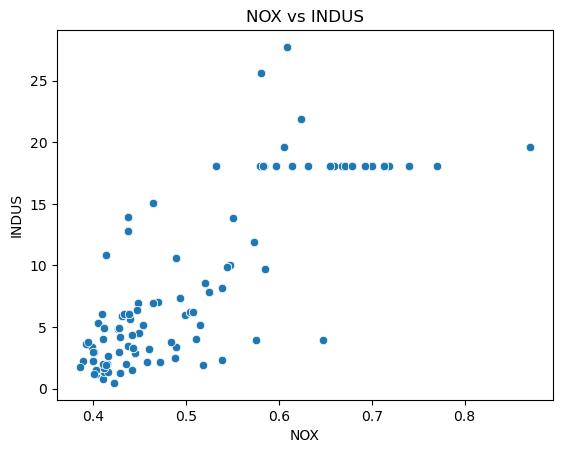

PearsonRResult(statistic=0.7636514469209149, pvalue=7.913361061242812e-98)

In [23]:
sns.scatterplot(x='NOX', y='INDUS',data=boston_df)
plt.title("NOX vs INDUS")
plt.show()
scipy.stats.pearsonr(boston_df['NOX'], boston_df['INDUS'])

The scatterplot demonstrates a positive linear correlation between nitric oxide concentration (NOX) and the proportion of non-retail business acres per town (INDUS), with the correlation being strongest in the lower left portion of the plot. However, an intriguing observation is that NOX levels continue to rise even as INDUS values plateau around 18, suggesting that the existing INDUS levels are sufficient to drive further NOX increments. This observation indicates that the relationship between NOX and INDUS extends beyond a simple linear correlation. While the results may suggest a bit more than a moderate correlation, the persistence of NOX increases despite INDUS plateauing suggests a stronger, non-linear relationship even causation between these variables.

C:\Users\karen.orozco\AppData\Local\Temp\ipykernel_8284\2259674008.py:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(boston_df['PTRATIO'], kde = False)


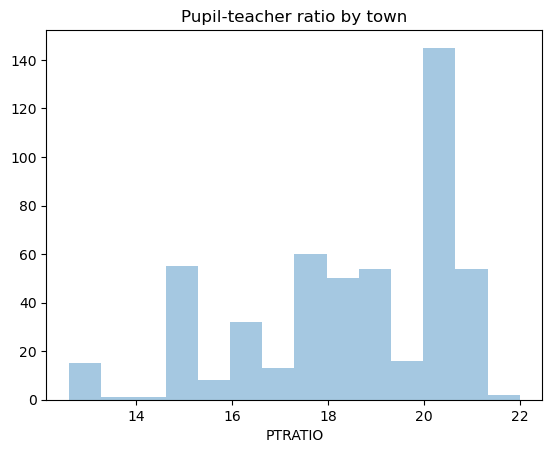

In [24]:
sns.distplot(boston_df['PTRATIO'], kde = False)
plt.title("Pupil-teacher ratio by town")
plt.show()

The pupil to teacher ratio (PTRATIO) variable is left-skewed, that indicates in this variable the order of central tendencies is as follows: mean < median < mode

Throughout the dataset, the most frequently observed ratio centers around 20.5

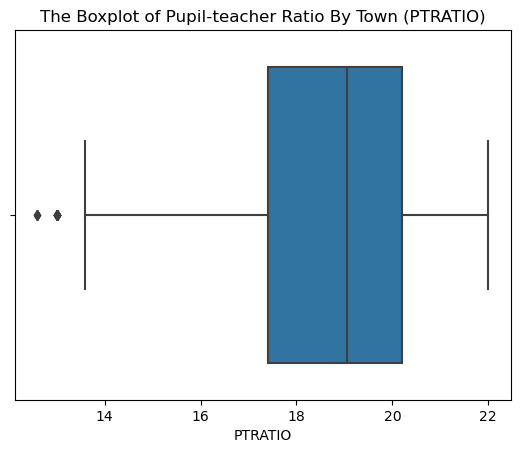

In [25]:
ax = sns.boxplot(x='PTRATIO', data=boston_df)
plt.title('The Boxplot of Pupil-teacher Ratio By Town (PTRATIO)')
plt.xlabel('PTRATIO')
plt.show()

# T-Test
State the hypothesis

H_0: there is no difference in median value of houses bounded by the Charles river or not (M_x=M_y)

H_1= there is a difference in median value of houses bounded by the Charles river or not (M_x<>M_y)

In [27]:
scipy.stats.levene(boston_df[boston_df['CHAS'] == 0]['MEDV'], boston_df[boston_df['CHAS'] == 1]['MEDV'], center='mean')

LeveneResult(statistic=8.75190489604598, pvalue=0.003238119367639829)

In [28]:
scipy.stats.levene(boston_df[boston_df['CHAS'] == 0]['MEDV'], boston_df[boston_df['CHAS'] == 1]['MEDV'], center='median')

LeveneResult(statistic=4.590342218715871, pvalue=0.03263097600633006)

In [ ]:
scipy.stats.ttest_ind(boston_df[boston_df['CHAS'] == 0]['MEDV'], boston_df[boston_df['CHAS'] == 1]['MEDV'], equal_var=True)

Since p-value is less than alpha value 0.05, we reject the null hypothesis, which suggests there is no statistically significant difference between in median value of houses bounded by the Charles river or not, thus there is a difference.

# ANOVA

H_0: there is no difference in Median values of houses (MEDV) for each proportion of owner occupied units built prior to 1940 (M_x=M_y)

H_2: there is a difference in Median values of houses (MEDV) for each proportion of owner occupied units built prior to 1940 (M_x<>M_y)


tf_lower=boston_df[boston_df['age'] == '35-']["MEDV"]
tf_sv=boston_df[boston_df['age'] == '35-70']["MEDV"]
sv_older=boston_df[boston_df['age'] == '70+']["MEDV"]
f_statistic, p_value = scipy.stats.f_oneway(tf_lower, tf_sv, sv_older)
print("F_Statistic: {0}, P-Value: {1}".format(f_statistic,p_value))

Since p-value is less than alpha value 0.05, we reject null hypothesis which suggests there is no statistically significant difference, but indeed it is there

# Pearson Correlation

H_0: "there is no relationship between Nitric oxide concentrations and proportion of non-retail business acres per town"
H_1: "there is a relationship between Nitric oxide concentrations and proportion of non-retail business acres per town"

In [31]:
scipy.stats.pearsonr(boston_df['NOX'], boston_df['INDUS'])

PearsonRResult(statistic=0.7636514469209149, pvalue=7.913361061242812e-98)

As the p-value is less than our significance level 0.05 'alpha value', we reject null hypothesis that means ther is no correlation between NOX and INDUS. This has ensured our finding and interpretation in scatter plot above, thus there is a correlation between these variables.

# Regression Analysis

In [33]:
X = boston_df['DIS']
y = boston_df['MEDV']
X = sm.add_constant(X) 

model = sm.OLS(y, X).fit()
predictions = model.predict(X)
model.summary()


<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                   MEDV   R-squared:                       0.062
Model:                            OLS   Adj. R-squared:                  0.061
Method:                 Least Squares   F-statistic:                     33.58
Date:                Mon, 19 Feb 2024   Prob (F-statistic):           1.21e-08
Time:                        10:11:16   Log-Likelihood:                -1823.9
No. Observations:                 506   AIC:                             3652.
Df Residuals:                     504   BIC:                             3660.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         18.3901      0.817     22.499      0.000      16.784      19.996
DIS            1.0916      0.188      5.795      0.000       0.722       1.462
==============================================================================
Omnibus:                      139.779   Durbin-Watson:                   0.570
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              305.104
Skew:                           1.466   Prob(JB):                     5.59e-67
Kurtosis:                       5.424   Cond. No.                         9.32
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

 By last regression analysis results, p-value is less than 0.05 alpha value that means we can reject null hypothesis, which means there is no any correlation between DIS and MEDV. While there is a correlation. Based on results, the correlation is not that strong but positive around 0.249 as coefficient value is 1.0916 This means that for every unit increase in weighted distance, the median housing value increases by approximately 1,091 because median value variable has been provided in $1000. This mostly suggests distance is not a significant consideration on specifying values of owner-occupied houses, this might be due to other factors influencing home values, or an inaccurate reflection of employment centers' relative importance in the weighted distance measure. A more detailed examination, including comprehensive data on these distance is needed for a more nuanced understanding.

Finally this relationship can be expressed mathematically as follows:

y = 18.39 + 1.0916x